# Pittsburgh Parking Meters by Neighborhood

In [50]:
import pandas as pd
import geopandas as gpd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Import parking CSV file
# Dataset: Metered parking locations in Pittsburgh
parking = pd.read_csv("./parking_meters.csv")

# Import shape files for mapping
neighborhoods = gpd.read_file("../neighborhood/Neighborhoods_.shp")
parking_locs = gpd.read_file("./pghdb_sde_PPA_ParkingMeters.shp")

## An overlay of metered parking locations in Pittsburgh

<AxesSubplot:>

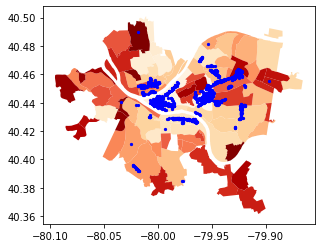

In [51]:
# Map all the parking locations over a map of Pittsburgh
pgh = neighborhoods.plot(cmap="OrRd")
parking_locs.plot(ax=pgh, color="blue", markersize=5)

## Number of metered parking locations grouped by neighborhood

In [52]:
# Count the number of metered parking locations in each neighborhood and sort descending
spots_per_neighborhood = parking.groupby("node").count().sort_values("fid", ascending=False)
# Rename for better readability
spots_per_neighborhood.rename(columns={'fid': 'count'}, inplace=True)
spots_per_neighborhood

,count,objectid,terminal_id,location,terminal_2,rate,latitude,longitude,x,y,...,terminal_3,rate_1,latitude_1,longitud_1,type,location_2,rates,enforcehou,enforeday,pm_zone
node,,,,,,,,,,,,,,,,,,,,,
Oakland,216,216,216,216,216,216,211,211,216,216,...,216,216,211,211,216,216,216,216,216,191
South Side,109,109,109,109,109,109,109,109,109,109,...,109,109,109,109,109,109,109,109,109,108
Downtown,104,104,104,104,104,104,102,102,104,104,...,104,104,99,99,104,104,104,104,104,95
NorthSide,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,83
Squirell Hill,69,69,69,69,69,69,68,68,69,69,...,69,69,68,68,69,69,69,69,69,68
ShadySide,66,66,66,66,66,66,65,65,66,66,...,66,66,65,65,66,66,5,5,5,63
Bloomfield,61,61,61,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,61,59
Uptown,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,55
East Liberty,59,59,59,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,55


## Top neighborhoods with the most parking locations

In [53]:
# Select the top 10 neighborhoods with the most metered parking locations
top_10_by_count = spots_per_neighborhood.head(15)
top_10_by_count

,count,objectid,terminal_id,location,terminal_2,rate,latitude,longitude,x,y,...,terminal_3,rate_1,latitude_1,longitud_1,type,location_2,rates,enforcehou,enforeday,pm_zone
node,,,,,,,,,,,,,,,,,,,,,
Oakland,216,216,216,216,216,216,211,211,216,216,...,216,216,211,211,216,216,216,216,216,191
South Side,109,109,109,109,109,109,109,109,109,109,...,109,109,109,109,109,109,109,109,109,108
Downtown,104,104,104,104,104,104,102,102,104,104,...,104,104,99,99,104,104,104,104,104,95
NorthSide,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,83
Squirell Hill,69,69,69,69,69,69,68,68,69,69,...,69,69,68,68,69,69,69,69,69,68
ShadySide,66,66,66,66,66,66,65,65,66,66,...,66,66,65,65,66,66,5,5,5,63
Bloomfield,61,61,61,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,61,59
Uptown,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,55
East Liberty,59,59,59,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,55


## Average price per neighborhood

In [67]:
# @param neighborhood = a dataframe containing only one neighborhood's info
# @returns average metered location price for given neighborhood
def calc_avg(neighborhood):
    sum = 0
    for rate in neighborhood:
        sum += float(str(rate).strip("$"))
    return sum / len(neighborhood)

# Replaces missing data with NaN to get dropped by dropna()
parking["node"].replace(' ', np.nan, inplace=True) 

# Call calc_avg on each neighborhood to calculate average meter cost in said neighborhood
avg_neighborhood_price = parking.groupby("node")["rates"].apply(calc_avg).dropna().sort_values().to_frame()
avg_neighborhood_price

,rates
node,
Allentown,1.000000
South Side,1.000000
NorthSide,1.000000
Lawrenceville,1.000000
Mt. Washingt*,1.000000
Brookline,1.000000
Bloomfield,1.000000
Beechview,1.000000
Carrick,1.000000


## Top cheapest neighborhoods

In [79]:
# Select top cheapest neighborhoods based on average cheapest meter price
top_10_cheapest_neighborhoods = avg_neighborhood_price.where(avg_neighborhood_price["rates"] <= 1.5).dropna() # Anything above $1.50 is bad

top_10_cheapest_neighborhoods

,rates
node,
Allentown,1.0
South Side,1.0
NorthSide,1.0
Lawrenceville,1.0
Mt. Washingt*,1.0
Brookline,1.0
Bloomfield,1.0
Beechview,1.0
Carrick,1.0


## Cheapest neighborhoods with most metered locations

In [85]:
# Perform an inner join on top average cheapest neighborhoods and top neighborhoods with most parking locations
# This finds the overall best neighborhoods base on lowest average parking cost and most locations for parking
best_neighborhoods = top_10_cheapest_neighborhoods \
    .join(other=top_10_by_count, how="inner", lsuffix="", rsuffix="_") \
    .sort_values("count", ascending=False)

# Store/Export for use in group notebook
best_parking = best_neighborhoods / best_neighborhoods.max()
%store best_parking

# Display only the Neighborhood name, rate, and count (number of locations)
best_neighborhoods.head(5)

Stored 'best_parking' (DataFrame)


,rates,count,objectid,terminal_id,location,terminal_2,rate,latitude,longitude,x,...,terminal_3,rate_1,latitude_1,longitud_1,type,location_2,rates_,enforcehou,enforeday,pm_zone
node,,,,,,,,,,,,,,,,,,,,,
South Side,1.0,109,109,109,109,109,109,109,109,109,...,109,109,109,109,109,109,109,109,109,108
NorthSide,1.0,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,83
Squirell Hill,1.5,69,69,69,69,69,69,68,68,69,...,69,69,68,68,69,69,69,69,69,68
Bloomfield,1.0,61,61,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,61,59
Uptown,1.5,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,55


<AxesSubplot:title={'center':'Best neighborhood locations'}>

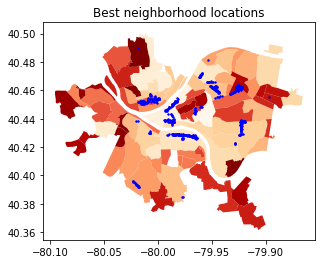

In [81]:
# Perform inner join to select the parking locations from the best neighborhoods
best_locs = parking_locs.join(other=best_neighborhoods, on="node", how="inner", lsuffix="_", rsuffix="__")

# Overlay the parking locations from the best neighborhoods on top of the Pittsburgh map
pgh = neighborhoods.plot(cmap="OrRd")
pgh.set_title("Best neighborhood locations")
best_locs.plot(ax=pgh, color="blue", legend=True, markersize=2)